In [167]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(8,5)})
sns.set(style="darkgrid", font_scale=1.2)



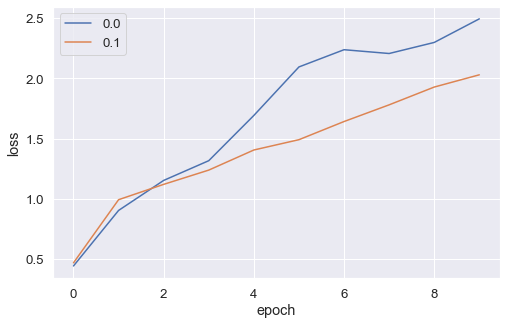

In [168]:
with open('epoch_errors_dataset_eps0.0.txt') as f:
    d = json.loads(f.read())

df1 = pd.DataFrame(d).reset_index()
df1.columns=['epoch', 'loss']
df1['exp'] = '0.0'

with open('epoch_errors_dataset_eps0.1.txt') as f:
    d = json.loads(f.read())

df2 = pd.DataFrame(d).reset_index()
df2.columns=['epoch', 'loss']
df2['exp'] = '0.1'


fig, ax = plt.subplots()


g = sns.lineplot(data=df1, x="epoch", y='loss', ax=ax,  label='0.0')
g = sns.lineplot(data=df2, x="epoch", y='loss', ax=ax,  label='0.1')
plt.show()


[-20.47200202941894, -23.95851325988769, -6.79332494735717, -17.80480575561523, -11.17000579833984]
291


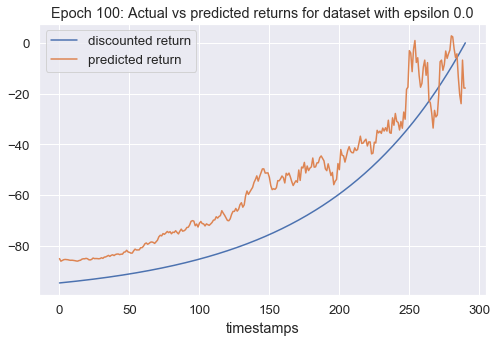

In [169]:
# deterministic policy predicted q values
deterministic_predicted = []
with open('predicted_rewards_dataset_eps0.0.txt') as f:
    for line in f.readlines():
        deterministic_predicted.append(float(line[:-2]))

print(deterministic_predicted[-5:])
deterministic_predicted[-1] = deterministic_predicted[-2]

# deterministic policy actual returns
deterministic_returns = []
with open('actual_rewards_dataset_eps0.0.txt') as f:
    for line in f.readlines():
        deterministic_returns.append(float(line[:-2]))

print(len(deterministic_returns))
deterministic_discounted_returns = []

g = 0
for r in deterministic_returns[::-1]:
    g = 0.99*g + r
    deterministic_discounted_returns.append(g)
    
deterministic_discounted_returns = deterministic_discounted_returns[::-1]

det_true_returns = pd.DataFrame(deterministic_discounted_returns, columns=['discounted_reward']).reset_index()
det_predicted_returns = pd.DataFrame(deterministic_predicted, columns=['predicted_rewards']).reset_index()
det_predicted_returns['timestamps'] = det_predicted_returns['index']
det_true_returns['timestamps'] = det_true_returns['index']

fig, ax = plt.subplots()


g = sns.lineplot(data=det_true_returns, x='timestamps', y="discounted_reward", ax=ax, label='discounted return')
g = sns.lineplot(data=det_predicted_returns, x='timestamps', y="predicted_rewards", ax=ax, label='predicted return')
plt.title('Epoch 100: Actual vs predicted returns for dataset with epsilon 0.0')
ax.set_ylabel('')    
plt.show()


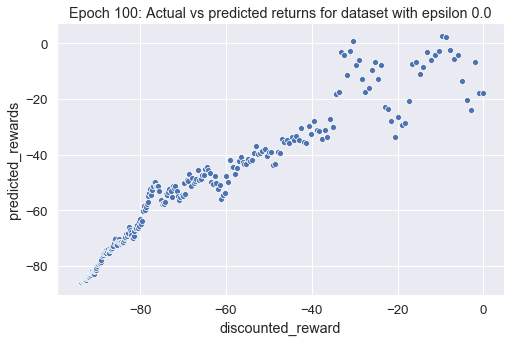

In [173]:
g = sns.scatterplot(det_true_returns['discounted_reward'], det_predicted_returns['predicted_rewards'])
plt.title('Epoch 100: Actual vs predicted returns for dataset with epsilon 0.0')
plt.show()


398


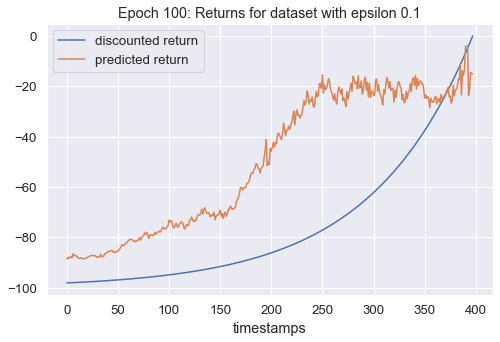

In [171]:
noisy_predicted = []
with open('predicted_rewards_dataset_eps0.1.txt') as f:
    for line in f.readlines():
        noisy_predicted.append(float(line[:-2]))
noisy_predicted[-1] = noisy_predicted[-2]

noisy_returns = []
with open('actual_rewards_dataset_eps0.1.txt') as f:
    for line in f.readlines():
        noisy_returns.append(float(line[:-2]))

print(len(noisy_returns))
discounted_returns = []

g = 0
for r in noisy_returns[::-1]:
    g = 0.99*g + r
    discounted_returns.append(g)
    
discounted_returns = discounted_returns[::-1]
true_returns = pd.DataFrame(discounted_returns, columns=['discounted_reward']).reset_index()

predicted_returns = pd.DataFrame(noisy_predicted, columns=['predicted_rewards']).reset_index()
predicted_returns['timestamps'] = predicted_returns['index']
true_returns['timestamps'] = true_returns['index']

fig, ax = plt.subplots()


g = sns.lineplot(data=true_returns, x='timestamps', y="discounted_reward", ax=ax, label='discounted return')
g = sns.lineplot(data=predicted_returns, x='timestamps', y="predicted_rewards", ax=ax, label='predicted return')
plt.title('Epoch 100: Returns for dataset with epsilon 0.1')
ax.set_ylabel('')    
plt.show()


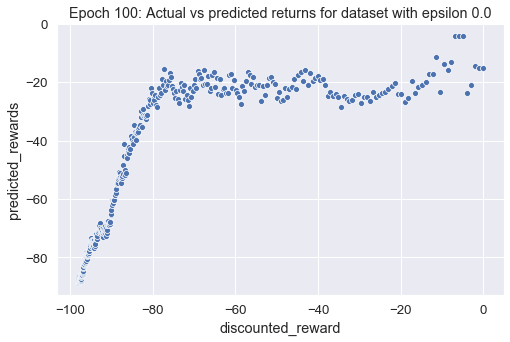

In [174]:
g = sns.scatterplot(true_returns['discounted_reward'], predicted_returns['predicted_rewards'])
plt.title('Epoch 100: Actual vs predicted returns for dataset with epsilon 0.0')
plt.show()
